In [1]:
# similar to previous 2 files here also we are doning for test 1
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os

In [2]:
path=r'D:\ml_datasets\bearing\3rd_test\4th_test\txt'

In [3]:
filename = '2004.03.04.09.27.46'
dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)
dataset

,0,1,2,3
0,0.034,0.264,0.039,-0.046
1,0.103,0.083,-0.061,-0.012
2,0.095,-0.039,-0.007,0.039
3,0.000,0.110,0.022,-0.002
4,0.005,0.154,-0.127,-0.020
...,...,...,...,...
20475,-0.010,0.120,-0.076,-0.015
20476,0.117,-0.146,-0.046,0.024
20477,0.024,-0.127,-0.007,0.095
20478,-0.090,0.034,-0.017,0.037


In [4]:
def compute_skewness(x): 
    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

In [5]:
def compute_kurtosis(x): 
    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [7]:
Time_feature_matrix=pd.DataFrame()

test_set=3

bearing_no=1# Provide the Bearing number [1,2,3,4] of the Test set

path=r'D:\ml_datasets\bearing\3rd_test\4th_test\txt'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data = np.array(dataset.iloc[:,bearing_no-1])

    feature_matrix=np.zeros((1,9))
    temp = bearing_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    Time_feature_matrix = pd.concat([Time_feature_matrix, df], ignore_index=False)
Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix = Time_feature_matrix.sort_index()

Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(bearing_no,test_set))
Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-03-04 09:27:00,0.547,-0.569,-0.004715,0.079631,0.079768,0.030875,1.292301,6.857363,-16.919417
2004-03-04 09:32:00,0.491,-0.461,-0.005102,0.078514,0.078678,-0.013806,1.156631,6.240622,-15.422493
2004-03-04 09:42:00,0.515,-0.454,-0.002242,0.079785,0.079815,0.033417,0.889743,6.452419,-35.600825
2004-03-04 09:52:00,0.520,-0.552,-0.002552,0.081044,0.081082,-0.027038,1.181453,6.413225,-31.769056
2004-03-04 10:02:00,0.369,-0.381,-0.002534,0.079126,0.079165,-0.017774,0.585448,4.661149,-31.240121
...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:00,0.742,-0.667,-0.002483,0.154769,0.154785,0.161841,0.284098,4.793745,-62.334039
2004-04-18 02:12:00,0.613,-0.576,-0.001885,0.137860,0.137870,0.109001,0.035104,4.446217,-73.121270
2004-04-18 02:22:00,0.754,-0.688,-0.002402,0.147165,0.147181,0.291569,0.552675,5.122955,-61.285383
2004-04-18 02:32:00,0.933,-0.632,-0.003033,0.154456,0.154482,0.440079,1.093348,6.039545,-50.941742


In [8]:
Time_feature_matrix=pd.DataFrame()

test_set=3

bearing_no=2# Provide the Bearing number [1,2,3,4] of the Test set

path=r'D:\ml_datasets\bearing\3rd_test\4th_test\txt'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data = np.array(dataset.iloc[:,bearing_no-1])

    feature_matrix=np.zeros((1,9))
    temp = bearing_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    Time_feature_matrix = pd.concat([Time_feature_matrix, df], ignore_index=False)
Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix = Time_feature_matrix.sort_index()

Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(bearing_no,test_set))
Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-03-04 09:27:00,0.527,-0.437,-0.003905,0.096643,0.096720,0.152035,0.776082,5.448737,-24.769832
2004-03-04 09:32:00,0.537,-0.479,-0.005115,0.091868,0.092008,0.146235,0.701574,5.836461,-17.987875
2004-03-04 09:42:00,0.496,-0.596,-0.002249,0.093405,0.093430,0.171792,0.936283,5.308774,-41.542582
2004-03-04 09:52:00,0.476,-0.513,-0.001115,0.092799,0.092803,0.166062,0.379024,5.129135,-83.228634
2004-03-04 10:02:00,0.518,-0.562,-0.000780,0.092828,0.092829,0.145970,0.503687,5.580131,-119.067164
...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:00,0.872,-0.886,-0.001246,0.234438,0.234436,0.076449,-0.102991,3.719571,-188.084871
2004-04-18 02:12:00,0.891,-0.818,-0.002077,0.207223,0.207229,-0.016977,-0.040071,4.299600,-99.779970
2004-04-18 02:22:00,0.864,-0.847,-0.002420,0.250652,0.250657,-0.029070,-0.230784,3.446939,-103.563982
2004-04-18 02:32:00,0.962,-1.292,-0.002095,0.257198,0.257200,-0.156068,0.658018,3.740276,-122.750315


In [9]:
Time_feature_matrix=pd.DataFrame()

test_set=3

bearing_no=3# Provide the Bearing number [1,2,3,4] of the Test set

path=r'D:\ml_datasets\bearing\3rd_test\4th_test\txt'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data = np.array(dataset.iloc[:,bearing_no-1])

    feature_matrix=np.zeros((1,9))
    temp = bearing_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    Time_feature_matrix = pd.concat([Time_feature_matrix, df], ignore_index=False)
Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix = Time_feature_matrix.sort_index()

Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(bearing_no,test_set))
Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-03-04 09:27:00,0.361,-0.310,-0.005148,0.066192,0.066390,0.083449,0.591902,5.437565,-12.896399
2004-03-04 09:32:00,0.295,-0.295,-0.006310,0.065986,0.066285,0.011828,0.359751,4.450449,-10.505622
2004-03-04 09:42:00,0.286,-0.286,-0.001293,0.069176,0.069186,0.049056,0.213724,4.133782,-53.519544
2004-03-04 09:52:00,0.349,-0.310,-0.002280,0.068600,0.068637,0.002209,0.299035,5.084751,-30.099513
2004-03-04 10:02:00,0.388,-0.374,-0.001727,0.067449,0.067469,0.031884,0.395754,5.750781,-39.058344
...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:00,3.167,-5.000,0.017613,0.495062,0.495363,-1.648364,16.742241,6.393285,28.124430
2004-04-18 02:12:00,2.378,-3.899,-0.002114,0.454472,0.454466,-0.656841,5.707273,5.232514,-214.967877
2004-04-18 02:22:00,4.346,-5.000,-0.079840,0.584635,0.590047,-0.426006,12.660025,7.365514,-7.390347
2004-04-18 02:32:00,4.998,-5.000,0.052137,0.756990,0.758765,-0.220131,7.058920,6.587018,14.553238


In [10]:
Time_feature_matrix=pd.DataFrame()

test_set=3

bearing_no=4# Provide the Bearing number [1,2,3,4] of the Test set

path=r'D:\ml_datasets\bearing\3rd_test\4th_test\txt'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data = np.array(dataset.iloc[:,bearing_no-1])

    feature_matrix=np.zeros((1,9))
    temp = bearing_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    Time_feature_matrix = pd.concat([Time_feature_matrix, df], ignore_index=False)
Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix = Time_feature_matrix.sort_index()

Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(bearing_no,test_set))
Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-03-04 09:27:00,0.254,-0.303,-0.004331,0.055325,0.055493,0.038845,0.559706,4.577189,-12.813293
2004-03-04 09:32:00,0.212,-0.249,-0.006725,0.052926,0.053351,0.013904,0.355708,3.973709,-7.932665
2004-03-04 09:42:00,0.278,-0.278,-0.003200,0.052607,0.052703,0.034235,0.477955,5.274828,-16.469227
2004-03-04 09:52:00,0.269,-0.300,-0.004379,0.054671,0.054844,0.007403,0.341732,4.904798,-12.524926
2004-03-04 10:02:00,0.227,-0.247,-0.003443,0.053805,0.053914,0.023473,0.261460,4.210398,-15.660536
...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:00,0.867,-0.955,-0.003682,0.248059,0.248081,-0.026558,0.022271,3.494830,-67.379632
2004-04-18 02:12:00,0.918,-0.813,-0.003608,0.253635,0.253654,0.104431,-0.257887,3.619096,-70.304147
2004-04-18 02:22:00,1.082,-1.104,-0.003425,0.279849,0.279863,0.002889,0.030199,3.866172,-81.701455
2004-04-18 02:32:00,0.881,-0.969,-0.003452,0.282160,0.282174,-0.108601,-0.486148,3.122183,-81.743400


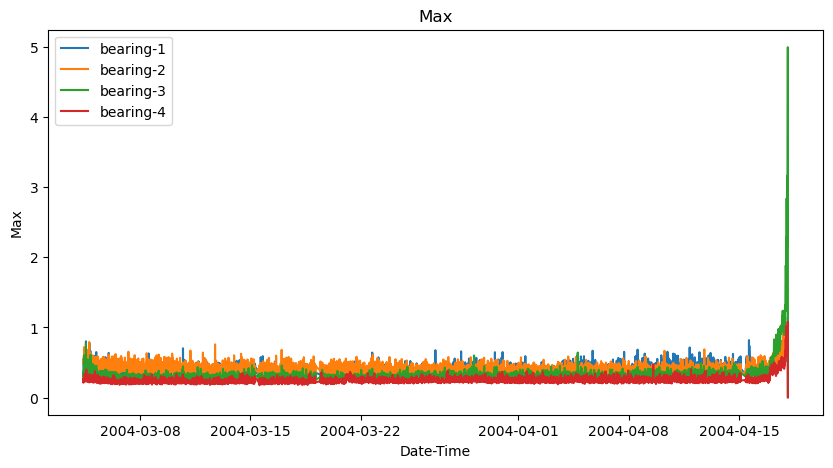

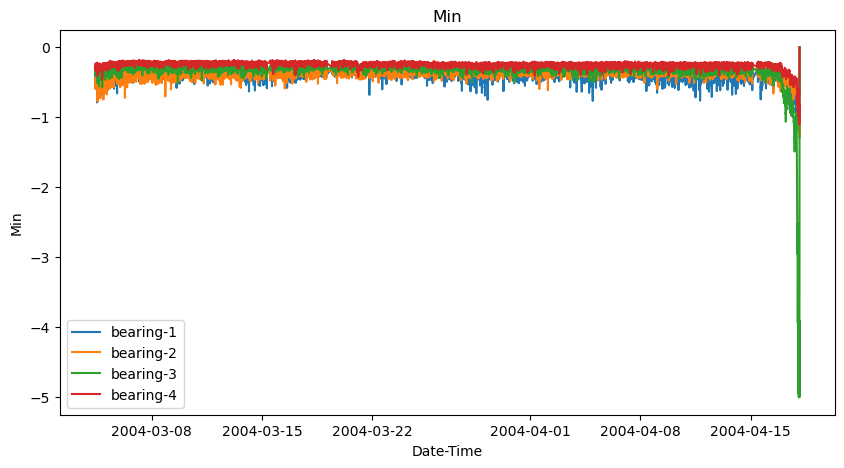

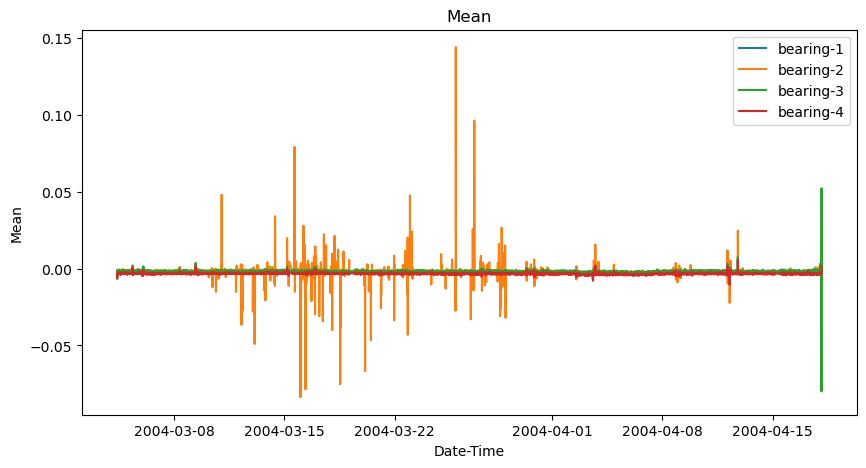

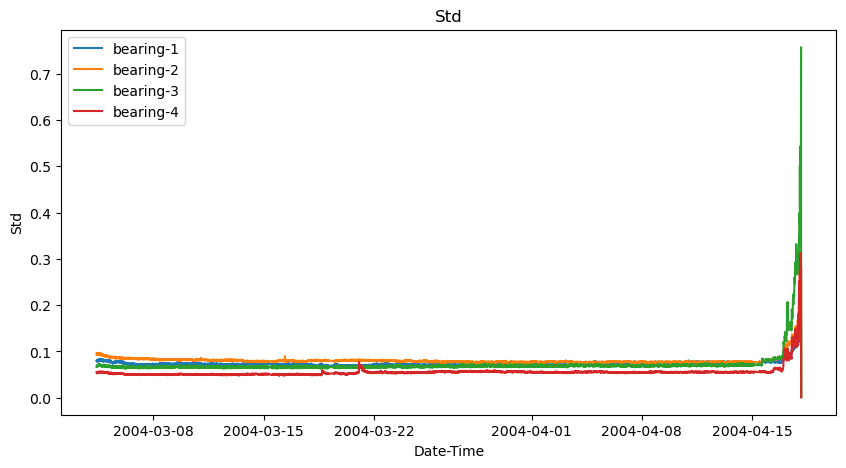

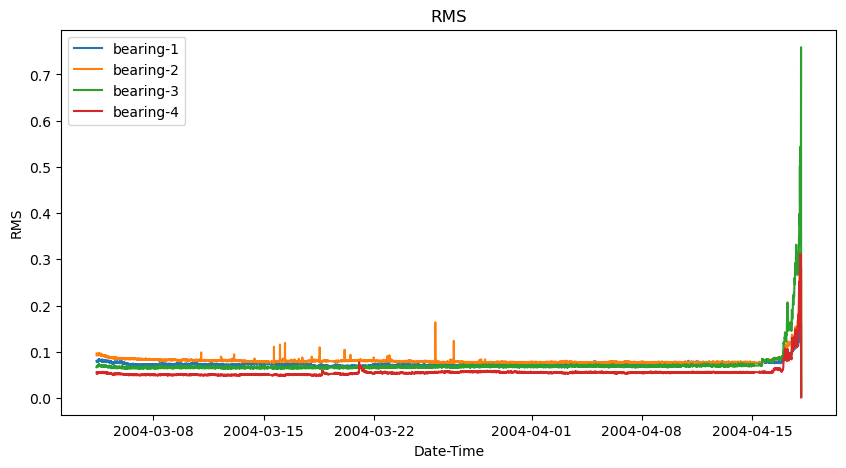

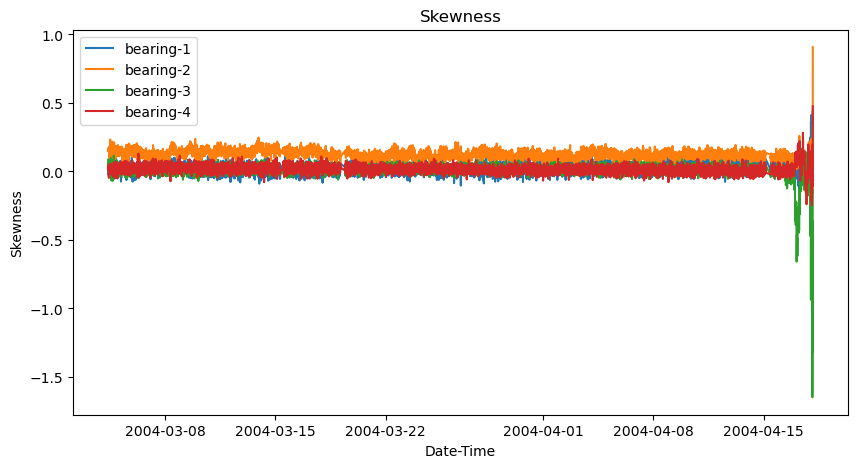

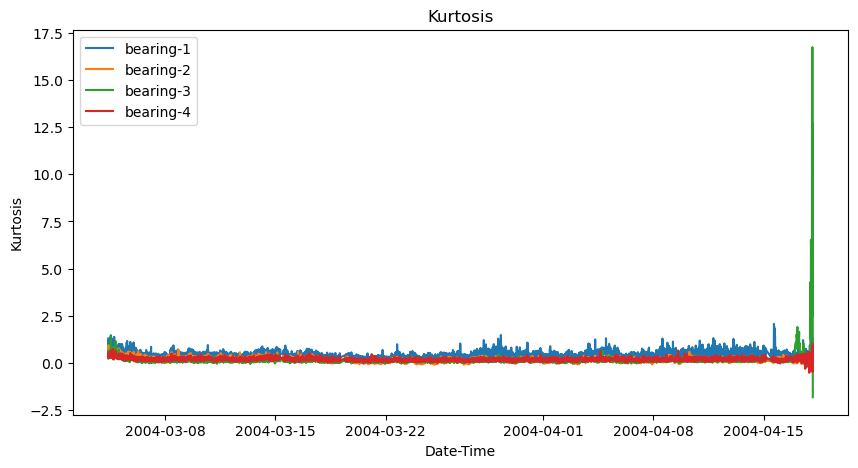

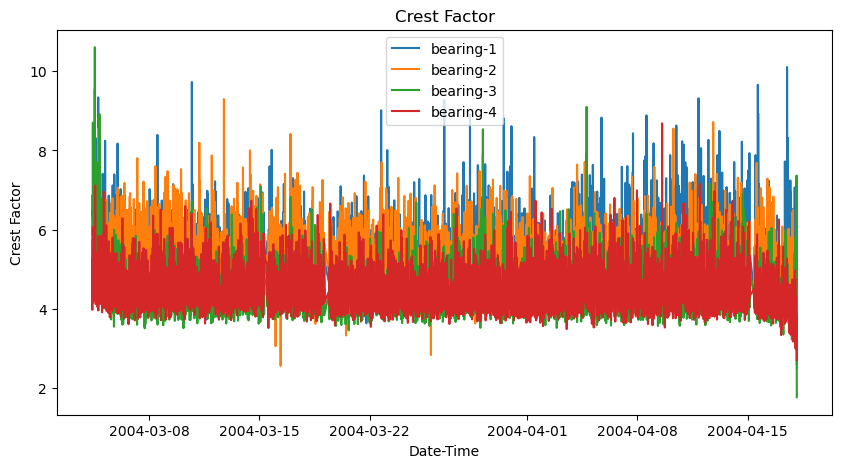

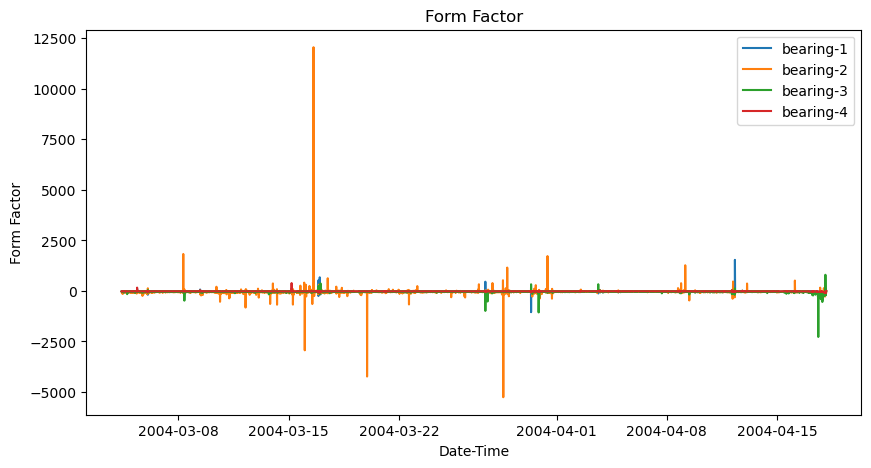

In [11]:
test_no=3

df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_{}.csv".format(test_no),index_col='Unnamed: 0')
df2 = pd.read_csv("Time_feature_matrix_Bearing_2_Test_{}.csv".format(test_no),index_col='Unnamed: 0')
df3 = pd.read_csv("Time_feature_matrix_Bearing_3_Test_{}.csv".format(test_no),index_col='Unnamed: 0')
df4 = pd.read_csv("Time_feature_matrix_Bearing_4_Test_{}.csv".format(test_no),index_col='Unnamed: 0')

df1.index = pd.to_datetime(df1.index)

for i,col in enumerate(df1.columns):  
    
        plt.figure(figsize=(10, 5))
        plt.plot(df1.index,df1[col])
        plt.plot(df1.index,df2[col])
        plt.plot(df1.index,df3[col])
        plt.plot(df1.index,df4[col])

        plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])

        plt.xlabel("Date-Time")
        plt.ylabel(col)
        plt.title(col)
        plt.show()

In [12]:
df3

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-03-04 09:27:00,0.361,-0.310,-0.005148,0.066192,0.066390,0.083449,0.591902,5.437565,-12.896399
2004-03-04 09:32:00,0.295,-0.295,-0.006310,0.065986,0.066285,0.011828,0.359751,4.450449,-10.505622
2004-03-04 09:42:00,0.286,-0.286,-0.001293,0.069176,0.069186,0.049056,0.213724,4.133782,-53.519544
2004-03-04 09:52:00,0.349,-0.310,-0.002280,0.068600,0.068637,0.002209,0.299035,5.084751,-30.099513
2004-03-04 10:02:00,0.388,-0.374,-0.001727,0.067449,0.067469,0.031884,0.395754,5.750781,-39.058344
...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:00,3.167,-5.000,0.017613,0.495062,0.495363,-1.648364,16.742241,6.393285,28.124430
2004-04-18 02:12:00,2.378,-3.899,-0.002114,0.454472,0.454466,-0.656841,5.707273,5.232514,-214.967877
2004-04-18 02:22:00,4.346,-5.000,-0.079840,0.584635,0.590047,-0.426006,12.660025,7.365514,-7.390347
2004-04-18 02:32:00,4.998,-5.000,0.052137,0.756990,0.758765,-0.220131,7.058920,6.587018,14.553238


In [13]:
#similar for outer fault in test 3 using bearing 3
df_orf=df3['2004-04-15 12:32:00':'2004-04-18 00:42:00']
fault=[]
for i in range (0,len(df_orf)):
    fault.append('Outer Race')

df_orf['Fault']=fault

df_orf.to_csv('outer_race_fault_test_3.csv',index=False)  
df_orf

C:\Users\sujal\AppData\Local\Temp\ipykernel_16180\1502110747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orf['Fault']=fault


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2004-04-15 12:32:00,0.315,-0.300,-0.002260,0.071999,0.072032,-0.017350,0.161074,4.373034,-31.867085,Outer Race
2004-04-15 12:42:00,0.278,-0.320,-0.000929,0.071960,0.071965,-0.020822,0.203632,3.863014,-77.468263,Outer Race
2004-04-15 12:52:00,0.403,-0.300,-0.001721,0.071967,0.071986,0.009853,0.275335,5.598312,-41.838775,Outer Race
2004-04-15 13:02:00,0.334,-0.332,-0.001242,0.070479,0.070488,0.037436,0.131765,4.738400,-56.769549,Outer Race
2004-04-15 13:12:00,0.295,-0.334,-0.002482,0.072242,0.072283,-0.030286,0.181303,4.081162,-29.120361,Outer Race
...,...,...,...,...,...,...,...,...,...,...
2004-04-18 00:02:00,2.280,-3.936,-0.001821,0.394083,0.394077,-0.416217,6.095530,5.785668,-216.407494,Outer Race
2004-04-18 00:12:00,1.750,-3.423,-0.002377,0.395931,0.395928,-0.664070,3.988261,4.419990,-166.549208,Outer Race
2004-04-18 00:22:00,2.202,-3.013,-0.004019,0.384375,0.384387,-0.150122,2.377175,5.728602,-95.651873,Outer Race
2004-04-18 00:32:00,1.824,-3.335,-0.003547,0.373875,0.373883,-0.408740,4.726666,4.878529,-105.403295,Outer Race


In [18]:
df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_3.csv")
df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_3.csv",index_col='Unnamed: 0')
df1.index = pd.to_datetime(df1.index)

In [19]:
df2 = pd.read_csv("Time_feature_matrix_Bearing_2_Test_3.csv")
df2 = pd.read_csv("Time_feature_matrix_Bearing_2_Test_3.csv",index_col='Unnamed: 0')
df2.index = pd.to_datetime(df2.index)

In [20]:
df3 = pd.read_csv("Time_feature_matrix_Bearing_3_Test_3.csv")
df3 = pd.read_csv("Time_feature_matrix_Bearing_3_Test_3.csv",index_col='Unnamed: 0')
df3.index = pd.to_datetime(df3.index)

In [21]:
df4 = pd.read_csv("Time_feature_matrix_Bearing_4_Test_3.csv")
df4 = pd.read_csv("Time_feature_matrix_Bearing_4_Test_3.csv",index_col='Unnamed: 0')
df4.index = pd.to_datetime(df4.index)

In [25]:
# this one is the one of the important part of the project in this 
#in this by using all 12 files or data we identify the commen 'normal condition' range 
Test=[1,2,3]
Bearing_No=[1,2,3,4]

df_normal_bearing = pd.DataFrame()# create the empty dataframe

for test_no in Test:
    for bearing_no in Bearing_No:
        temp = pd.read_csv("Time_feature_matrix_Bearing_{}_Test_{}.csv".format(bearing_no,test_no),index_col='Unnamed: 0')#for reading all files

        
        #starting is from 21% of the lengthof the respective csv dataframe , and ending to 23% of its length
        starting = int(np.floor(len(temp) * 0.21))
        ending = int(np.floor(len(temp) * 0.23))
#get to know more about it
        start_time = temp.index[starting]
        end_time = temp.index[ending]

        temp = temp[start_time:end_time]
        df_normal_bearing = pd.concat([df_normal_bearing, temp], ignore_index=False)# appending all to df_normal_bearing file
fault=[]
for i in range (0,len(df_normal_bearing)):
    fault.append('Normal')
#make fault colume and assign the 'normal condition ' values to it which is stored in fault list
df_normal_bearing['Fault']=fault

df_normal_bearing.to_csv('Normal_Bearing.csv',index=False)   # convert it to csv files
df_normal_bearing

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2003-11-01 14:01:00,0.398,-0.625,-0.117085,0.093069,0.149567,-0.012753,0.931376,2.661008,-1.277421,Normal
2003-11-01 14:11:00,0.422,-0.657,-0.117744,0.093095,0.150100,-0.033307,0.876667,2.811460,-1.274798,Normal
2003-11-01 14:21:00,0.466,-0.605,-0.116695,0.091405,0.148230,0.022064,0.946745,3.143757,-1.270240,Normal
2003-11-01 14:31:00,0.356,-0.713,-0.117174,0.094340,0.150430,-0.088984,0.858388,2.366546,-1.283821,Normal
2003-11-01 14:41:00,0.500,-0.647,-0.117876,0.093033,0.150165,-0.036459,0.957214,3.329671,-1.273921,Normal
...,...,...,...,...,...,...,...,...,...,...
2004-03-14 11:02:00,0.276,-0.244,-0.003381,0.051343,0.051453,0.050065,0.367385,5.364090,-15.216136,Normal
2004-03-14 11:12:00,0.244,-0.295,-0.002698,0.051048,0.051118,-0.017866,0.357546,4.773283,-18.945901,Normal
2004-03-14 11:22:00,0.234,-0.222,-0.003480,0.051675,0.051791,0.039894,0.298893,4.518154,-14.882157,Normal
2004-03-14 11:32:00,0.225,-0.212,-0.003334,0.052118,0.052223,0.005201,0.253224,4.308406,-15.661694,Normal
